In [121]:
%%capture
#%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import os, sys
import numpy as np

import pylab as plt
import matplotlib as mpl
import scipy.io

#plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({"axes.grid" : True})
#plt.rcParams['font.family'] = 'DeJavu Serif'
#plt.rcParams['font.serif'] = ['Times New Roman']

#plt.rcParams.update({'font.size': 14})

/home/giachero/work/repos-github/twpazer/src/twpazer/sazer.py:44: DeprecationWarning: invalid escape sequence '\m'
  'barunit'  : '$\mu$m',
/home/giachero/work/repos-github/twpazer/src/twpazer/sazer.py:45: DeprecationWarning: invalid escape sequence '\e'
  'barvar'   : '$\ell$',


# Simulation as a function ot the Kinetic Inductance $L_k$

In [246]:
from twpazer.sazer import Z0zer

In [247]:
pathname  = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/v2/simdata/8.5'
filenameC = 'fishbone-microstrip_d100_eps8.5_l11.0um_s1um_w1um_d100nm_320cells_C_geo_response_d_20240726_145417.sid'
filenameL = 'fishbone-microstrip_d100_eps8.5_l11.0um_s1um_w1um_d100nm_320cells_L_geo_response_d_20240726_145417.sid'

In [248]:
options = {'fmin'      : 0,         
           'issave'    : 1,          
           'isformat'  : 0,        
           'target'    : 'Lk',          
           'Lnorm'     : 1e12,          
           'Lunit'     : 'pH',          
           'Cnorm'     : 1e15,          
           'Cunit'     : 'fF',          
           't'         : 10,             
           's'         : 1,          
           'w'         : 1,          
           'eps'       : 8.5,           
           'loss'      : 0,           
           'd'         : 100,            
           'ncell'     : 320,          
           'nfit'      : 1000, 
           'barname'   : 'Kinetic Inductance',
           'barvar'    : '$L_k$', 
           'barunit'   : 'pH/sq'}

In [249]:
z0zer = Z0zer(os.path.join(pathname,filenameL), os.path.join(pathname,filenameC), **options)

In [250]:
z0zer.compute()

(__computeLC) Compute L
(__computeLC) Compute C
(__computeZ0) Compute Z0
(__fitLC) Fitting L0
(__fitX) Performing linear fit
(__fitX) L0 from polynomial fit : L = 0.65 pH
(__fitLC) Fitting C0
(__fitX) Performing linear fit
(__fitX) C0 from polynomial fit : C = 22.76 fF


<IPython.core.display.Javascript object>


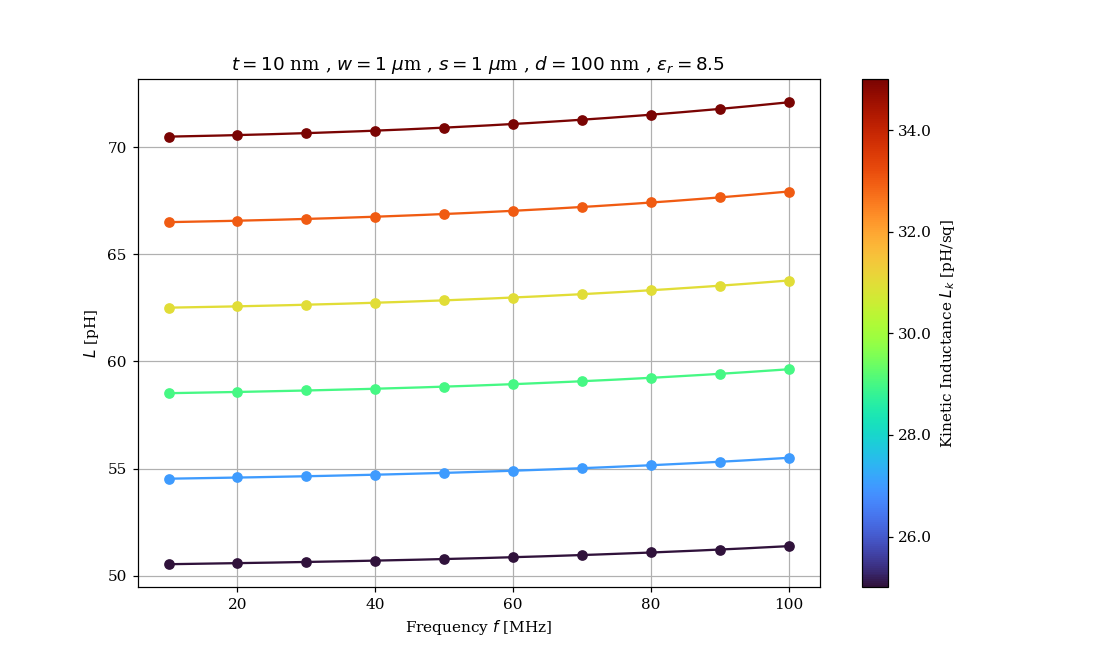

<IPython.core.display.Javascript object>


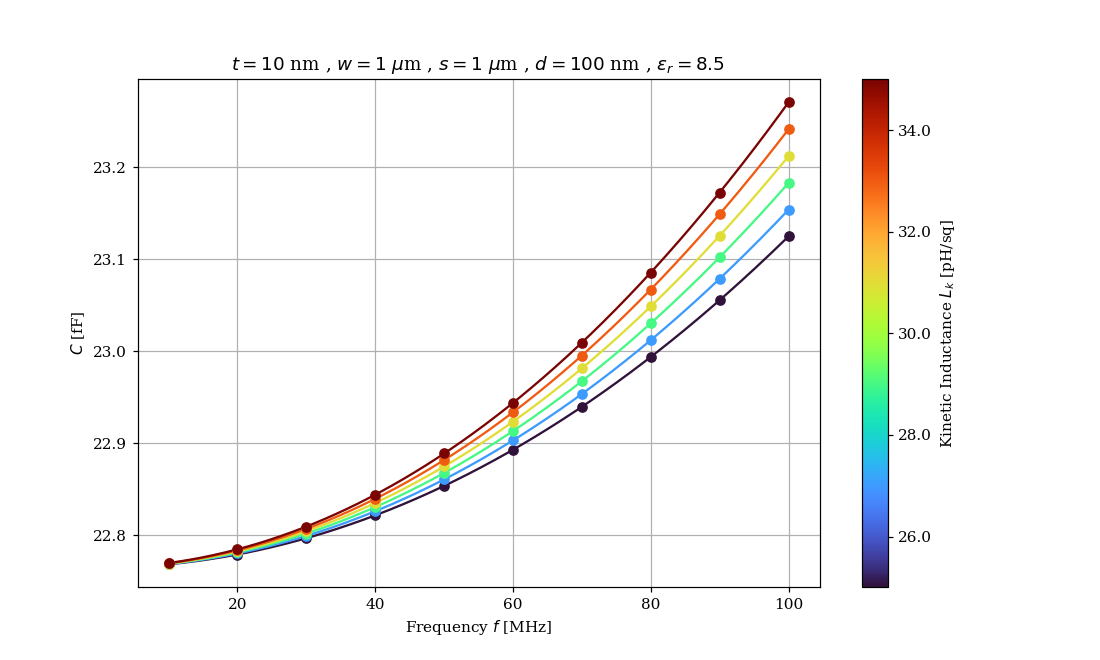

<IPython.core.display.Javascript object>


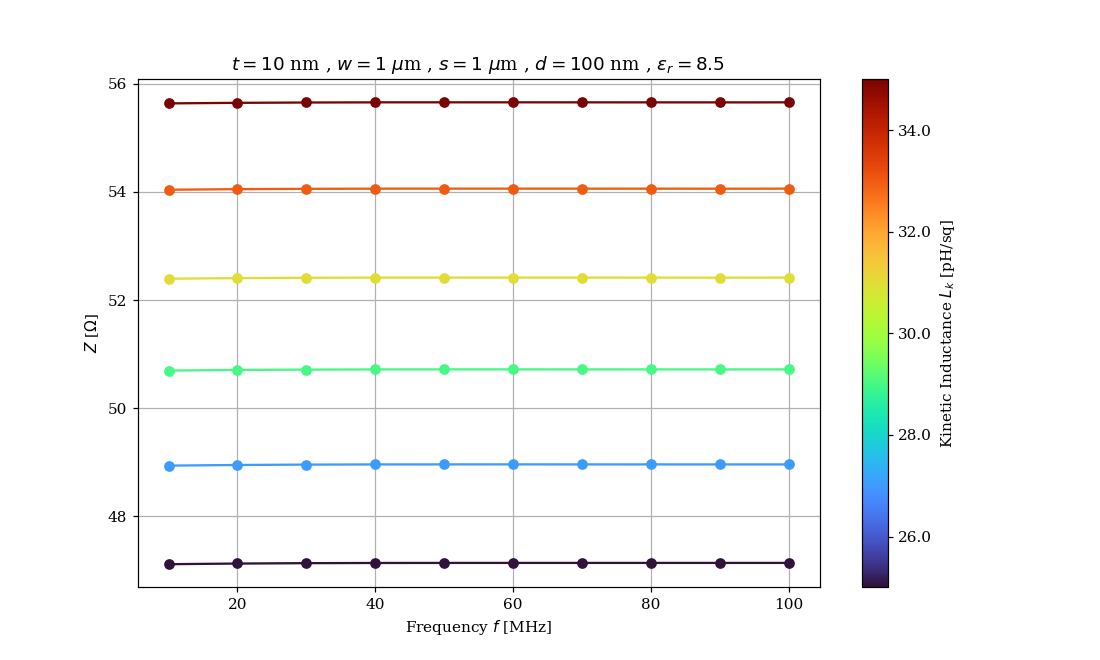

In [251]:
z0zer.update(Ldigits=0, Cdigits=0, Zdigits=0)
for tag in ['Lall' , 'Call', 'Zall']:
    z0zer.plot(tag)

<IPython.core.display.Javascript object>


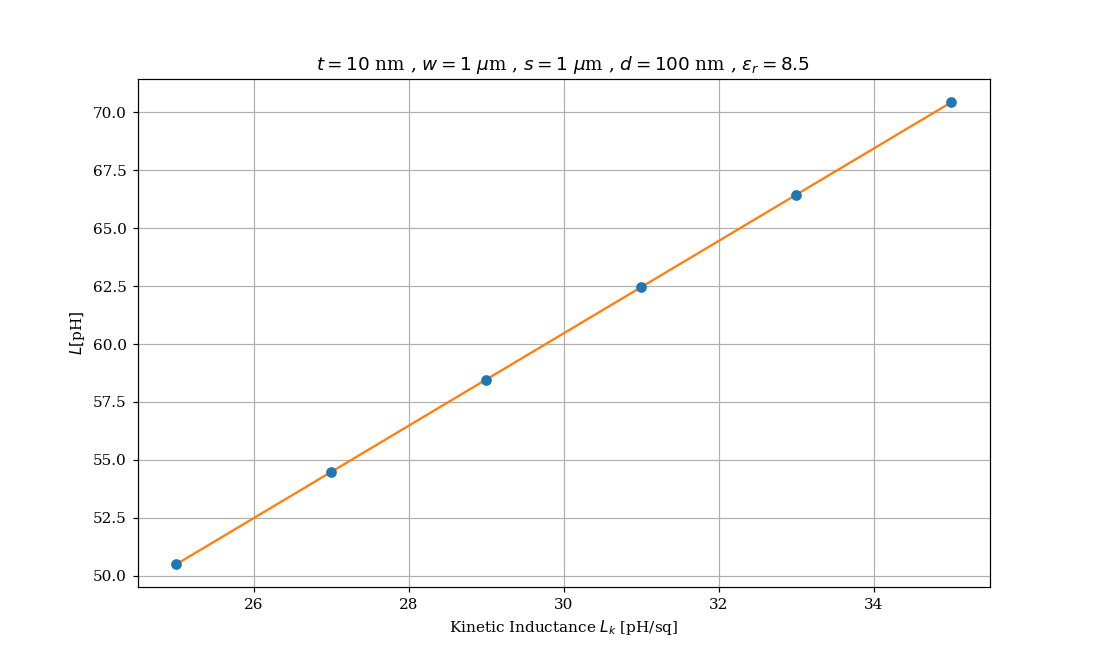

<IPython.core.display.Javascript object>


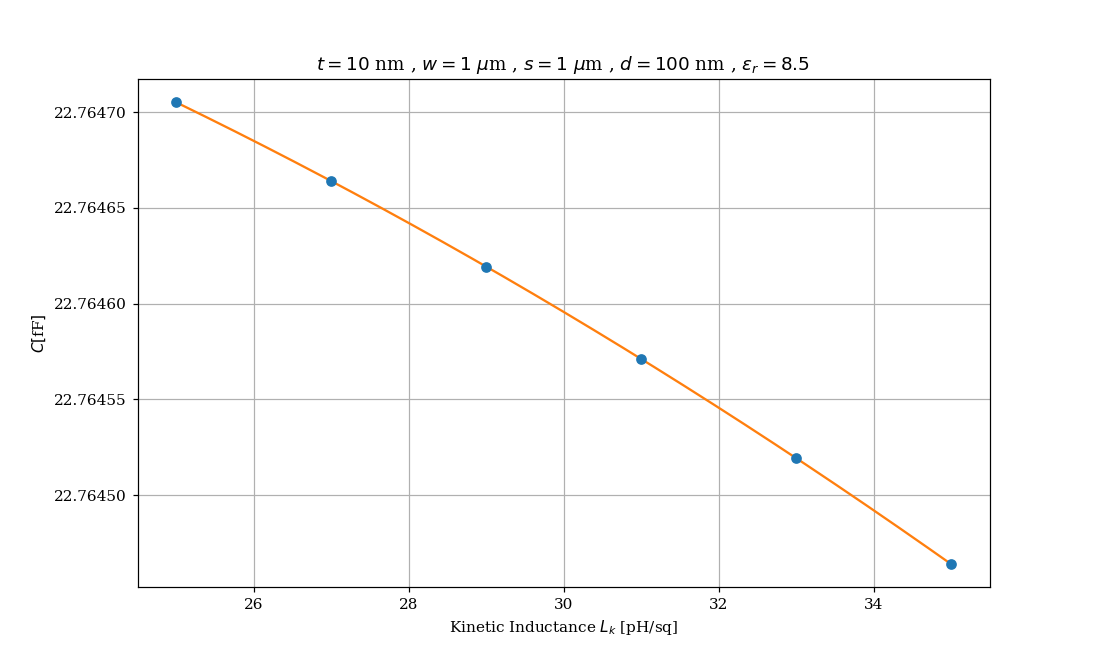

<IPython.core.display.Javascript object>


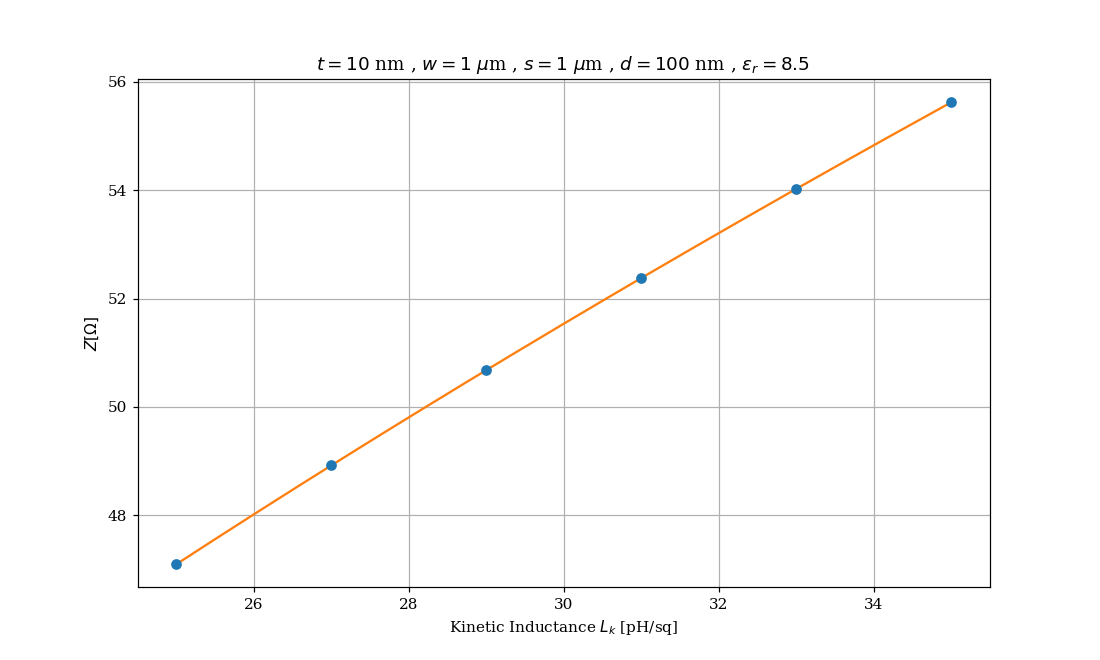

In [252]:
z0zer.update(Ldigits=2, Cdigits=0, Zdigits=0, isfit=True)

for x in ['L', 'C', 'Z']:
    z0zer.plot(x)


In [253]:
from dartwarslab.base import sreader

In [262]:
pathname  = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/v2/simdata/8.5'
filenameC = 'fishbone-microstrip_d100_eps8.5_l11.0um_s1um_w1um_d100nm_320cells_C_geo_response_d_20240726_145417.sid'

sid = sreader(data=sreader(os.path.join(os.path.join(pathname,filenameC))).unique('merge'))

In [263]:
sid.compute('Y')

In [264]:
sid.get()[0]

{'Lk': 25.0,
 'l': 11.0,
 'eps': 8.5,
 'data': array([[ 1.00000000e+07,  9.98952702e-01, -4.57547813e-02],
        [ 2.00000000e+07,  9.95813486e-01, -9.14084294e-02],
        [ 3.00000000e+07,  9.90590378e-01, -1.36860157e-01],
        [ 4.00000000e+07,  9.83296719e-01, -1.82009785e-01],
        [ 5.00000000e+07,  9.73951094e-01, -2.26758166e-01],
        [ 6.00000000e+07,  9.62577289e-01, -2.71007312e-01],
        [ 7.00000000e+07,  9.49204128e-01, -3.14660967e-01],
        [ 8.00000000e+07,  9.33865360e-01, -3.57624788e-01],
        [ 9.00000000e+07,  9.16599657e-01, -3.99806288e-01],
        [ 1.00000000e+08,  8.97450152e-01, -4.41115885e-01]]),
 'P1': array([[ 6.00000000e+07,  2.12582111e+03, -6.03640000e-05,
          1.65237710e+02,  0.00000000e+00,  0.00000000e+00,
          2.71134000e-04],
        [ 7.00000000e+07,  2.12582097e+03,  0.00000000e+00,
          1.65237708e+02,  0.00000000e+00,  0.00000000e+00,
          2.71134000e-04],
        [ 8.00000000e+07,  2.12582083e+03,

In [265]:
f   = sid.get()[0]['pars']['freq']
Y11 = sid.get()[0]['pars']['Y11mag']

from scipy.optimize import curve_fit

def model0(x, C, Lf):
    return 2*np.pi*x*C/(1-Lf*C*(2*np.pi*x)**2) 


def model(x, C):
    return 2*np.pi*x*C

guess = np.array([20e-12, 200e-12])

popt, pcov = curve_fit(model0, f, Y11, guess)

print(popt[0]/320*1e15)
print(popt[1]/320*1e12)

22.764635664028983
16.931135926669043


## Fit function for $Y_{11}$


$$
\displaystyle Y_{11}=\frac{j\omega C}{1-\omega^2L_fC}
$$

<IPython.core.display.Javascript object>


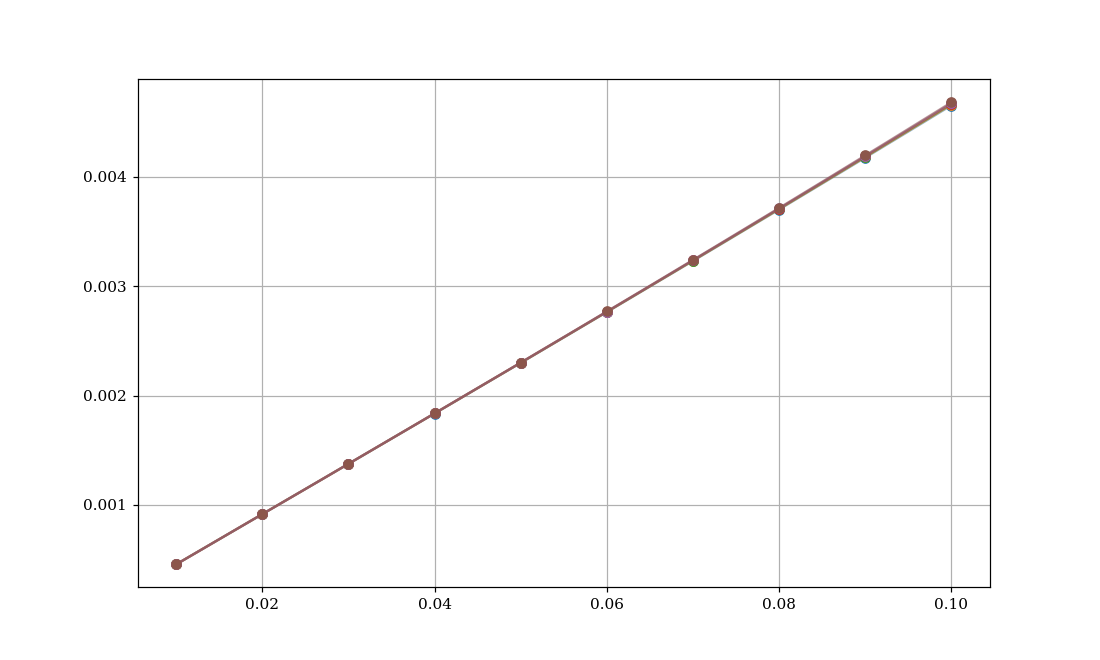

25.0
22.764635664028983
16.931135926669043
0.6772454370667618


27.0
22.76458381508305
18.271528428791406
0.6767232751404224


29.0
22.7645279198958
19.61273105206721
0.6763010707609383


31.0
22.76446797366853
20.95474603199368
0.6759595494191509


33.0
22.764403951247715
22.29757441941106
0.6756840733154866


35.0
22.76433582740139
23.641219583060835
0.675463416658881




In [266]:
plt.figure()
for s in sid:
    f   = s['pars']['freq']
    Y11 = s['pars']['Y11mag']

    guess = np.array([20e-12, 200e-12])    
    popt, pcov = curve_fit(model0, f, Y11, guess)
    
    f_fit = np.linspace(np.min(f), np.max(f), 1000);
        
    print(s['Lk'])
    print(popt[0]/320*1e15)
    print(popt[1]/320*1e12)
    print(popt[1]/320*1e12/(s['Lk']))
    print('\n')
        
    plt.plot(f/1e9, Y11, marker='o', ls='none')
    plt.plot(f_fit/1e9, model0(f_fit, *popt),  alpha=0.5, color=plt.gca().lines[-1].get_color())


In [267]:
sid.compute('LC')

In [268]:
def model5(x, C, Lf):
    return C/(1-(2*np.pi*x)**2*Lf*C)

## Fit function for $Y_{11}$


$$
\displaystyle C_{1}=\frac{C}{1-\omega^2L_fC}
$$

<IPython.core.display.Javascript object>


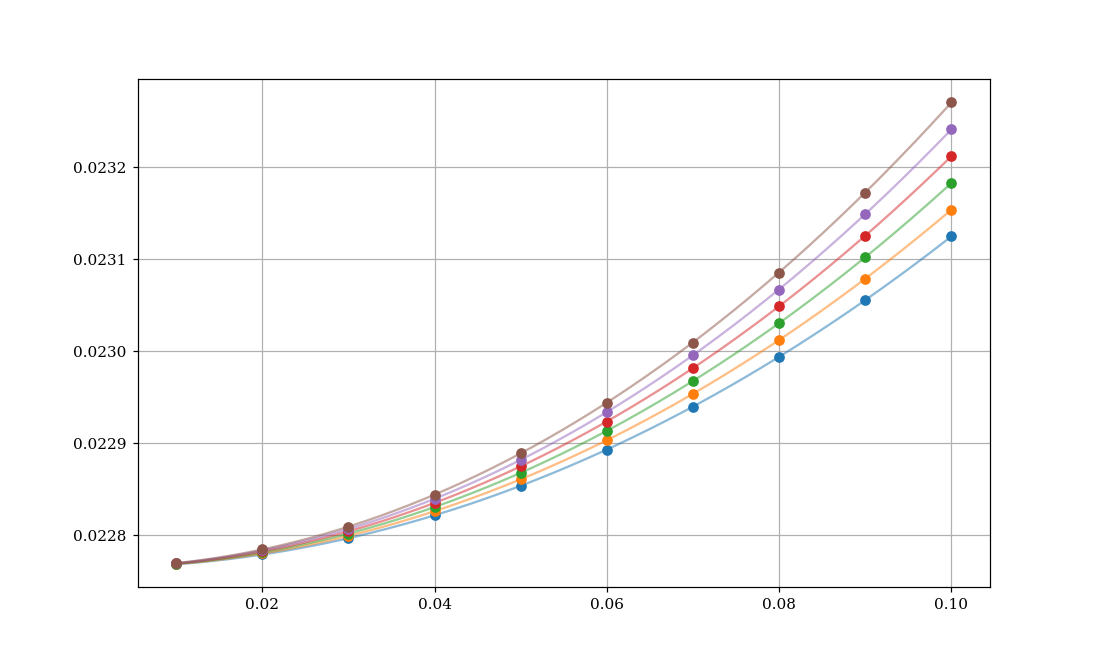

25.0
22.76482098560579
16.91779511616368
0.6767118046465472


27.0
22.764799644677414
18.256000828591887
0.6761481788367365


29.0
22.76477664903091
19.594847375915418
0.6756843922729454


31.0
22.764751970984715
20.9343389302466
0.6753012558144065


33.0
22.764725599889463
22.274475822899568
0.6749841158454415


35.0
22.7646975158693
23.61526135137917
0.6747217528965478




In [269]:
plt.figure()
for s in sid:
    f  = s['pars']['freq']
    C1 = s['pars']['C1']
    
    guess = np.array([20e-12, s['Lk']*1e-12])    
    popt, pcov = curve_fit(model5, f, C1, guess)
    
    f_fit = np.linspace(np.min(f), np.max(f), 1000);
    
    print(s['Lk'])
    print(popt[0]/320*1e15)
    print(popt[1]/320*1e12)
    print(popt[1]/320*1e12/s['Lk'])
    print('\n')

    
    plt.plot(f/1e9, C1/320*1e12, marker='o', ls='none')
    plt.plot(f_fit/1e9, model5(f_fit, *popt)/320*1e12,  alpha=0.5, color=plt.gca().lines[-1].get_color())
    
plt.ticklabel_format(useOffset=False, style='plain', axis='y')